In [43]:
import pandas as pd
import numpy as np
from numpy import absolute
from numpy import mean
from numpy import std
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt

# from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [2]:
df = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/data.csv', parse_dates=['wk_strt_dt'], index_col='wk_strt_dt')

In [3]:
print(df.shape)
df.head()

(209, 79)


yr_nbr  qtr_nbr  prd  wk_nbr  wk_in_yr_nbr   mdip_dm  mdip_inst  \
wk_strt_dt                                                                    
2014-08-03    2014        3    7       1            27   4863885   29087520   
2014-08-10    2014        3    7       2            28  20887502    8345120   
2014-08-17    2014        3    7       3            29  11097724   17276800   
2014-08-24    2014        3    7       4            30   1023446   18468480   
2014-08-31    2014        3    8       1            31  21109811   26659920   

            mdip_nsp  mdip_auddig  mdip_audtr  ...  seas_prd_12  seas_week_40  \
wk_strt_dt                                     ...                              
2014-08-03   2421933       692315    37778097  ...            0             0   
2014-08-10   3984494       475810    12063657  ...            0             0   
2014-08-17   1846832       784732     5770115  ...            0             0   
2014-08-24   2394834      1032301    12174000  ...            0             0   
2014-08-31   3312008       400456    31656134  ...            0             0   

            seas_week_41  seas_week_42  seas_week_43  seas_week_44  \
wk_strt_dt                                                           
2014-08-03             0             0             0             0   
2014-08-10             0             0             0             0   
2014-08-17             0             0             0             0   
2014-08-24             0             0             0             0   
2014-08-31             0             0             0             0   

            seas_week_45  seas_week_46  seas_week_47  seas_week_48  
wk_strt_dt                                                          
2014-08-03             0             0             0             0  
2014-08-10             0             0             0             0  
2014-08-17             0             0             0             0  
2014-08-24             0             0             0             0  
2014-08-31             0             0             0             0  

[5 rows x 79 columns]

In [4]:
pd.set_option('display.max_rows', 80)
df.dtypes

yr_nbr                        int64
qtr_nbr                       int64
prd                           int64
wk_nbr                        int64
wk_in_yr_nbr                  int64
mdip_dm                       int64
mdip_inst                     int64
mdip_nsp                      int64
mdip_auddig                   int64
mdip_audtr                    int64
mdip_vidtr                    int64
mdip_viddig                   int64
mdip_so                       int64
mdip_on                       int64
mdip_em                       int64
mdip_sms                      int64
mdip_aff                      int64
mdip_sem                      int64
mdsp_dm                     float64
mdsp_inst                   float64
mdsp_nsp                    float64
mdsp_auddig                 float64
mdsp_audtr                  float64
mdsp_vidtr                  float64
mdsp_viddig                 float64
mdsp_so                     float64
mdsp_on                     float64
mdsp_sem                    

In [5]:
df.describe()

yr_nbr     qtr_nbr         prd      wk_nbr  wk_in_yr_nbr  \
count   209.000000  209.000000  209.000000  209.000000    209.000000   
mean   2016.004785    2.507177    6.526316    2.703349     26.626794   
std       1.226697    1.122838    3.465562    1.274015     15.119856   
min    2014.000000    1.000000    1.000000    1.000000      1.000000   
25%    2015.000000    2.000000    4.000000    2.000000     14.000000   
50%    2016.000000    3.000000    7.000000    3.000000     27.000000   
75%    2017.000000    4.000000   10.000000    4.000000     40.000000   
max    2018.000000    4.000000   12.000000    5.000000     53.000000   

            mdip_dm     mdip_inst      mdip_nsp   mdip_auddig    mdip_audtr  \
count  2.090000e+02  2.090000e+02  2.090000e+02  2.090000e+02  2.090000e+02   
mean   9.544510e+06  1.247717e+07  1.616957e+06  1.002816e+06  2.295103e+07   
std    8.293082e+06  1.024959e+07  2.203341e+06  8.122848e+05  1.567124e+07   
min    0.000000e+00  4.853300e+04  0.000000e+00  1.561800e+04  0.000000e+00   
25%    2.087021e+06  5.304240e+06  2.542340e+05  4.577220e+05  1.236705e+07   
50%    7.664954e+06  8.911466e+06  8.870720e+05  8.061170e+05  1.910160e+07   
75%    1.533852e+07  1.786920e+07  2.248483e+06  1.344765e+06  2.956004e+07   
max    3.979871e+07  6.545146e+07  1.553181e+07  5.418819e+06  9.066538e+07   

       ...  seas_prd_12  seas_week_40  seas_week_41  seas_week_42  \
count  ...   209.000000    209.000000    209.000000    209.000000   
mean   ...     0.081340      0.019139      0.019139      0.019139   
std    ...     0.274012      0.137342      0.137342      0.137342   
min    ...     0.000000      0.000000      0.000000      0.000000   
25%    ...     0.000000      0.000000      0.000000      0.000000   
50%    ...     0.000000      0.000000      0.000000      0.000000   
75%    ...     0.000000      0.000000      0.000000      0.000000   
max    ...     1.000000      1.000000      1.000000      1.000000   

       seas_week_43  seas_week_44  seas_week_45  seas_week_46  seas_week_47  \
count    209.000000    209.000000    209.000000    209.000000    209.000000   
mean       0.019139      0.019139      0.019139      0.019139      0.019139   
std        0.137342      0.137342      0.137342      0.137342      0.137342   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       seas_week_48  
count    209.000000  
mean       0.019139  
std        0.137342  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 79 columns]

In [6]:
#Check for nulls and only print columns that contain nulls
missing_data = df.isnull().sum()
#if missing_data[1] > 0: print(missing_data)
missing_data

yr_nbr                      0
qtr_nbr                     0
prd                         0
wk_nbr                      0
wk_in_yr_nbr                0
mdip_dm                     0
mdip_inst                   0
mdip_nsp                    0
mdip_auddig                 0
mdip_audtr                  0
mdip_vidtr                  0
mdip_viddig                 0
mdip_so                     0
mdip_on                     0
mdip_em                     0
mdip_sms                    0
mdip_aff                    0
mdip_sem                    0
mdsp_dm                     0
mdsp_inst                   0
mdsp_nsp                    0
mdsp_auddig                 0
mdsp_audtr                  0
mdsp_vidtr                  0
mdsp_viddig                 0
mdsp_so                     0
mdsp_on                     0
mdsp_sem                    0
sales                       0
me_ics_all                  0
me_gas_dpg                  0
st_ct                       0
mrkdn_valadd_edw            0
mrkdn_pdm 

In [8]:
df.nunique()

yr_nbr                        5
qtr_nbr                       4
prd                          12
wk_nbr                        5
wk_in_yr_nbr                 53
mdip_dm                     208
mdip_inst                   209
mdip_nsp                    203
mdip_auddig                 207
mdip_audtr                  207
mdip_vidtr                  207
mdip_viddig                 204
mdip_so                     158
mdip_on                     209
mdip_em                     209
mdip_sms                    201
mdip_aff                    209
mdip_sem                    209
mdsp_dm                     209
mdsp_inst                   209
mdsp_nsp                    201
mdsp_auddig                 205
mdsp_audtr                  208
mdsp_vidtr                  207
mdsp_viddig                 206
mdsp_so                     198
mdsp_on                     209
mdsp_sem                    209
sales                       209
me_ics_all                   43
me_gas_dpg                  190
st_ct   

C:\Users\djdit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

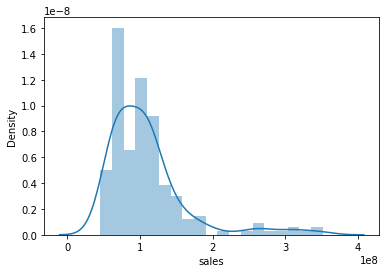

In [9]:
sns.distplot(df['sales'])

<AxesSubplot:>

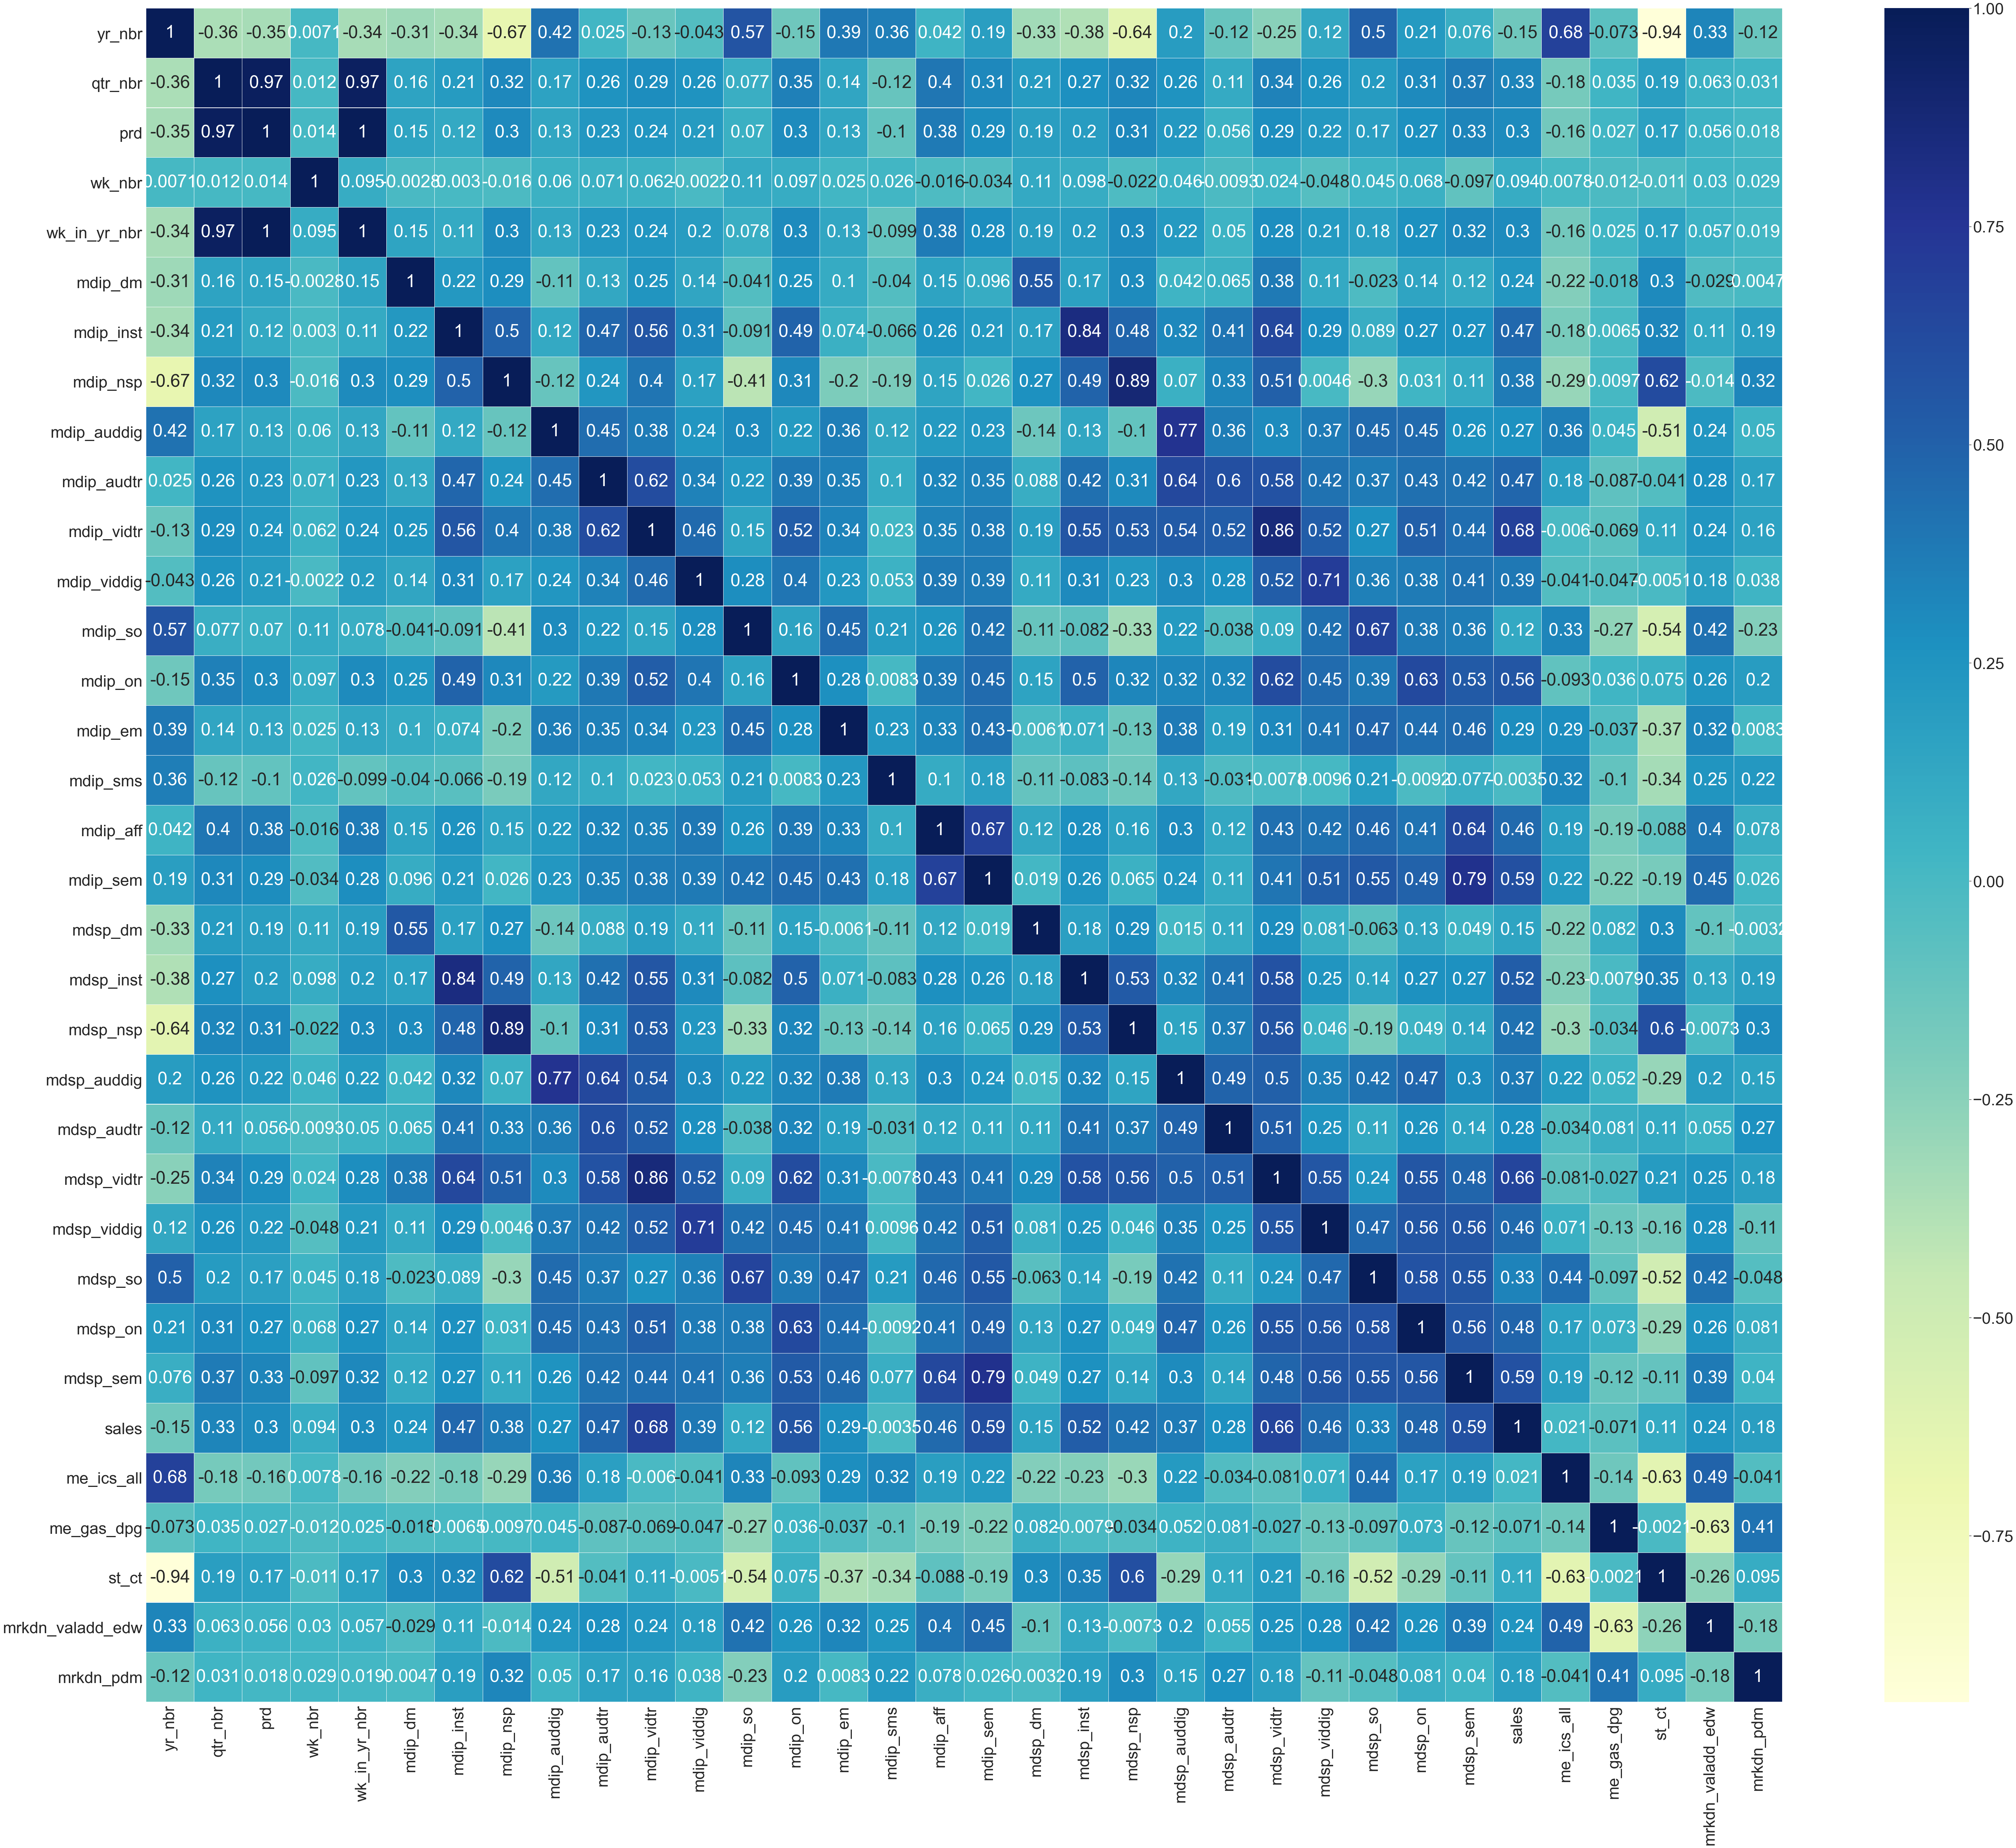

In [10]:
df1 = df.iloc[ : , :34]
sales_corr = df1.corr()
sns.set(font_scale=4)
plt.subplots(figsize=(100,85))

sns.heatmap(sales_corr, cmap='YlGnBu', linewidth=.005, annot=True)

In [11]:
# Create new data frame with relevant dates, sales, spend data
sale_spend = df.loc[:,df.columns.intersection(['sales', 'mdsp_dm','mdsp_inst', 'mdsp_nsp','mdsp_auddig', 'mdsp_audtr',
                'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so', 'mdsp_on', 'mdsp_sem'])]

In [12]:
sale_spend.rename(columns={'sales': 'Sales', 'mdsp_dm' : 'Direct_Mail','mdsp_inst' : 'Insert', 
                           'mdsp_nsp' : 'Newspaper','mdsp_auddig' : 'Digital_Audio', 'mdsp_audtr' : 'Radio', 'mdsp_vidtr' : 'TV',
                           'mdsp_viddig' : 'Digital_Video', 'mdsp_so' : 'Social', 'mdsp_on' : 'Online_Display', 'mdsp_sem' : 'SEM'}, 
                  inplace=True)

In [13]:
print(sale_spend.shape)
sale_spend.head()

(209, 11)


Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
wk_strt_dt                                                                
2014-08-03    678410.26  129759.66  507635.16        2700.69  254134.14   
2014-08-10    661097.71   70355.33  625719.37        5039.35  106602.98   
2014-08-17   1874338.43  107720.37  277532.61        2610.93   59011.42   
2014-08-24    306583.37  141708.61  186028.61        6032.91  178010.46   
2014-08-31   2366274.16  160691.30  706694.09        5187.32  144097.56   

                   TV  Digital_Video  Social  Online_Display        SEM  \
wk_strt_dt                                                                
2014-08-03  216725.59       45397.90     0.0        61364.75  355954.51   
2014-08-10  108919.26        2903.36     0.0       132643.90  336306.72   
2014-08-17   74032.19        8110.48     0.0        76741.27  344787.96   
2014-08-24  110995.66        6516.22     0.0       193043.55  365495.11   
2014-08-31  225140.84       19381.12     0.0       249612.89  401789.35   

                  Sales  
wk_strt_dt               
2014-08-03  72051457.64  
2014-08-10  78794770.54  
2014-08-17  70071185.56  
2014-08-24  68642464.59  
2014-08-31  86190784.65

In [14]:
# create lag variables for 1y for revenue and channels to look for seasonality

sale_spend = pd.concat([sale_spend, sale_spend.shift(52).add_suffix('_lag1y')], axis=1)

sale_spend['Sales_lag1w'] = sale_spend['Sales'].shift()
sale_spend['Sales_lag3m'] = sale_spend['Sales'].shift(13)


In [15]:
# Create rolling average variable for 1y, 3m, and 1w for all channel spend 
sale_spend = pd.concat([sale_spend, sale_spend.rolling(1).mean().add_suffix('_p1w'), sale_spend.rolling(13).mean().add_suffix('_p3m'), 
                        sale_spend.rolling(52).mean().add_suffix('_p1y')], axis=1)

In [16]:
print(sale_spend.shape)
sale_spend.head()

(209, 96)


Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
wk_strt_dt                                                                
2014-08-03    678410.26  129759.66  507635.16        2700.69  254134.14   
2014-08-10    661097.71   70355.33  625719.37        5039.35  106602.98   
2014-08-17   1874338.43  107720.37  277532.61        2610.93   59011.42   
2014-08-24    306583.37  141708.61  186028.61        6032.91  178010.46   
2014-08-31   2366274.16  160691.30  706694.09        5187.32  144097.56   

                   TV  Digital_Video  Social  Online_Display        SEM  ...  \
wk_strt_dt                                                               ...   
2014-08-03  216725.59       45397.90     0.0        61364.75  355954.51  ...   
2014-08-10  108919.26        2903.36     0.0       132643.90  336306.72  ...   
2014-08-17   74032.19        8110.48     0.0        76741.27  344787.96  ...   
2014-08-24  110995.66        6516.22     0.0       193043.55  365495.11  ...   
2014-08-31  225140.84       19381.12     0.0       249612.89  401789.35  ...   

            Digital_Audio_lag1y_p1y  Radio_lag1y_p1y  TV_lag1y_p1y  \
wk_strt_dt                                                           
2014-08-03                      NaN              NaN           NaN   
2014-08-10                      NaN              NaN           NaN   
2014-08-17                      NaN              NaN           NaN   
2014-08-24                      NaN              NaN           NaN   
2014-08-31                      NaN              NaN           NaN   

            Digital_Video_lag1y_p1y  Social_lag1y_p1y  \
wk_strt_dt                                              
2014-08-03                      NaN               NaN   
2014-08-10                      NaN               NaN   
2014-08-17                      NaN               NaN   
2014-08-24                      NaN               NaN   
2014-08-31                      NaN               NaN   

            Online_Display_lag1y_p1y  SEM_lag1y_p1y  Sales_lag1y_p1y  \
wk_strt_dt                                                             
2014-08-03                       NaN            NaN              NaN   
2014-08-10                       NaN            NaN              NaN   
2014-08-17                       NaN            NaN              NaN   
2014-08-24                       NaN            NaN              NaN   
2014-08-31                       NaN            NaN              NaN   

            Sales_lag1w_p1y  Sales_lag3m_p1y  
wk_strt_dt                                    
2014-08-03              NaN              NaN  
2014-08-10              NaN              NaN  
2014-08-17              NaN              NaN  
2014-08-24              NaN              NaN  
2014-08-31              NaN              NaN  

[5 rows x 96 columns]

In [17]:
pd.set_option('display.max_rows', 100)
sale_spend.dtypes

Direct_Mail                 float64
Insert                      float64
Newspaper                   float64
Digital_Audio               float64
Radio                       float64
TV                          float64
Digital_Video               float64
Social                      float64
Online_Display              float64
SEM                         float64
Sales                       float64
Direct_Mail_lag1y           float64
Insert_lag1y                float64
Newspaper_lag1y             float64
Digital_Audio_lag1y         float64
Radio_lag1y                 float64
TV_lag1y                    float64
Digital_Video_lag1y         float64
Social_lag1y                float64
Online_Display_lag1y        float64
SEM_lag1y                   float64
Sales_lag1y                 float64
Sales_lag1w                 float64
Sales_lag3m                 float64
Direct_Mail_p1w             float64
Insert_p1w                  float64
Newspaper_p1w               float64
Digital_Audio_p1w           

In [18]:
sale_spend = sale_spend.loc[:, ~sale_spend.columns.duplicated()]
sale_spend.drop(['Sales_p1w', 'Sales_p3m', 'Sales_p1y'], axis=1, inplace=True)
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p1y')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1w_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag3m_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1w_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag3m_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1w_p1y')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag3m_p1y')]

In [19]:
print(sale_spend.shape)
sale_spend.head()

(209, 54)


Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
wk_strt_dt                                                                
2014-08-03    678410.26  129759.66  507635.16        2700.69  254134.14   
2014-08-10    661097.71   70355.33  625719.37        5039.35  106602.98   
2014-08-17   1874338.43  107720.37  277532.61        2610.93   59011.42   
2014-08-24    306583.37  141708.61  186028.61        6032.91  178010.46   
2014-08-31   2366274.16  160691.30  706694.09        5187.32  144097.56   

                   TV  Digital_Video  Social  Online_Display        SEM  ...  \
wk_strt_dt                                                               ...   
2014-08-03  216725.59       45397.90     0.0        61364.75  355954.51  ...   
2014-08-10  108919.26        2903.36     0.0       132643.90  336306.72  ...   
2014-08-17   74032.19        8110.48     0.0        76741.27  344787.96  ...   
2014-08-24  110995.66        6516.22     0.0       193043.55  365495.11  ...   
2014-08-31  225140.84       19381.12     0.0       249612.89  401789.35  ...   

            Direct_Mail_p1y  Insert_p1y  Newspaper_p1y  Digital_Audio_p1y  \
wk_strt_dt                                                                  
2014-08-03              NaN         NaN            NaN                NaN   
2014-08-10              NaN         NaN            NaN                NaN   
2014-08-17              NaN         NaN            NaN                NaN   
2014-08-24              NaN         NaN            NaN                NaN   
2014-08-31              NaN         NaN            NaN                NaN   

            Radio_p1y  TV_p1y  Digital_Video_p1y  Social_p1y  \
wk_strt_dt                                                     
2014-08-03        NaN     NaN                NaN         NaN   
2014-08-10        NaN     NaN                NaN         NaN   
2014-08-17        NaN     NaN                NaN         NaN   
2014-08-24        NaN     NaN                NaN         NaN   
2014-08-31        NaN     NaN                NaN         NaN   

            Online_Display_p1y  SEM_p1y  
wk_strt_dt                               
2014-08-03                 NaN      NaN  
2014-08-10                 NaN      NaN  
2014-08-17                 NaN      NaN  
2014-08-24                 NaN      NaN  
2014-08-31                 NaN      NaN  

[5 rows x 54 columns]

In [20]:
#Drop 1st year data
sale_spend = sale_spend[53:len(sale_spend)]

In [21]:
print(sale_spend.shape)
sale_spend.head()

(156, 54)


Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
wk_strt_dt                                                                
2015-08-09    416160.76   77698.33  459923.73        3942.06   96550.71   
2015-08-16   1474306.52  106188.92  247435.73        2097.17  132930.04   
2015-08-23    527024.17  104125.45  181933.38        1800.33   70754.33   
2015-08-30    673751.13  138373.84  121351.78        2083.53  155625.84   
2015-09-06   1448011.10  154866.35  677627.88        3406.89  233850.55   

                   TV  Digital_Video    Social  Online_Display        SEM  \
wk_strt_dt                                                                  
2015-08-09  114713.91       10588.33  15138.28       129329.71  482111.74   
2015-08-16   57893.16       10309.24  15138.28        61538.94  350792.50   
2015-08-23   49519.84       21659.02  25951.34       137532.34  565924.44   
2015-08-30  149631.97       14295.41  21498.85       186763.14  353038.61   
2015-09-06  297784.55       12318.68  32107.14       235416.66  319188.04   

            ...  Direct_Mail_p1y     Insert_p1y  Newspaper_p1y  \
wk_strt_dt  ...                                                  
2015-08-09  ...    956212.108077  108678.923269  511178.403077   
2015-08-16  ...    948519.186731  108649.472308  510599.616923   
2015-08-23  ...    952758.432885  107926.719231  510520.862500   
2015-08-30  ...    920209.913077  107497.537308  499264.279615   
2015-09-06  ...    937447.416731  109425.516346  504204.427885   

            Digital_Audio_p1y      Radio_p1y         TV_p1y  \
wk_strt_dt                                                    
2015-08-09        3106.448846  131415.502308  202613.926538   
2015-08-16        3096.568846  132837.014231  202303.560577   
2015-08-23        3015.173077  130774.396346  201121.333269   
2015-08-30        2955.484808  130996.094038  199669.239615   
2015-09-06        2959.425000  132401.396923  203240.843846   

            Digital_Video_p1y    Social_p1y  Online_Display_p1y        SEM_p1y  
wk_strt_dt                                                                      
2015-08-09        9886.259038  23690.176346       174269.543654  472929.162885  
2015-08-16        9928.542885  23981.297115       173977.191154  473044.634808  
2015-08-23       10219.750577  24480.361346       172909.667885  476899.045000  
2015-08-30       10121.948462  24893.800769       171701.018846  475961.530769  
2015-09-06        9992.733846  25511.245769       173225.469808  476206.123846  

[5 rows x 54 columns]

<AxesSubplot:>

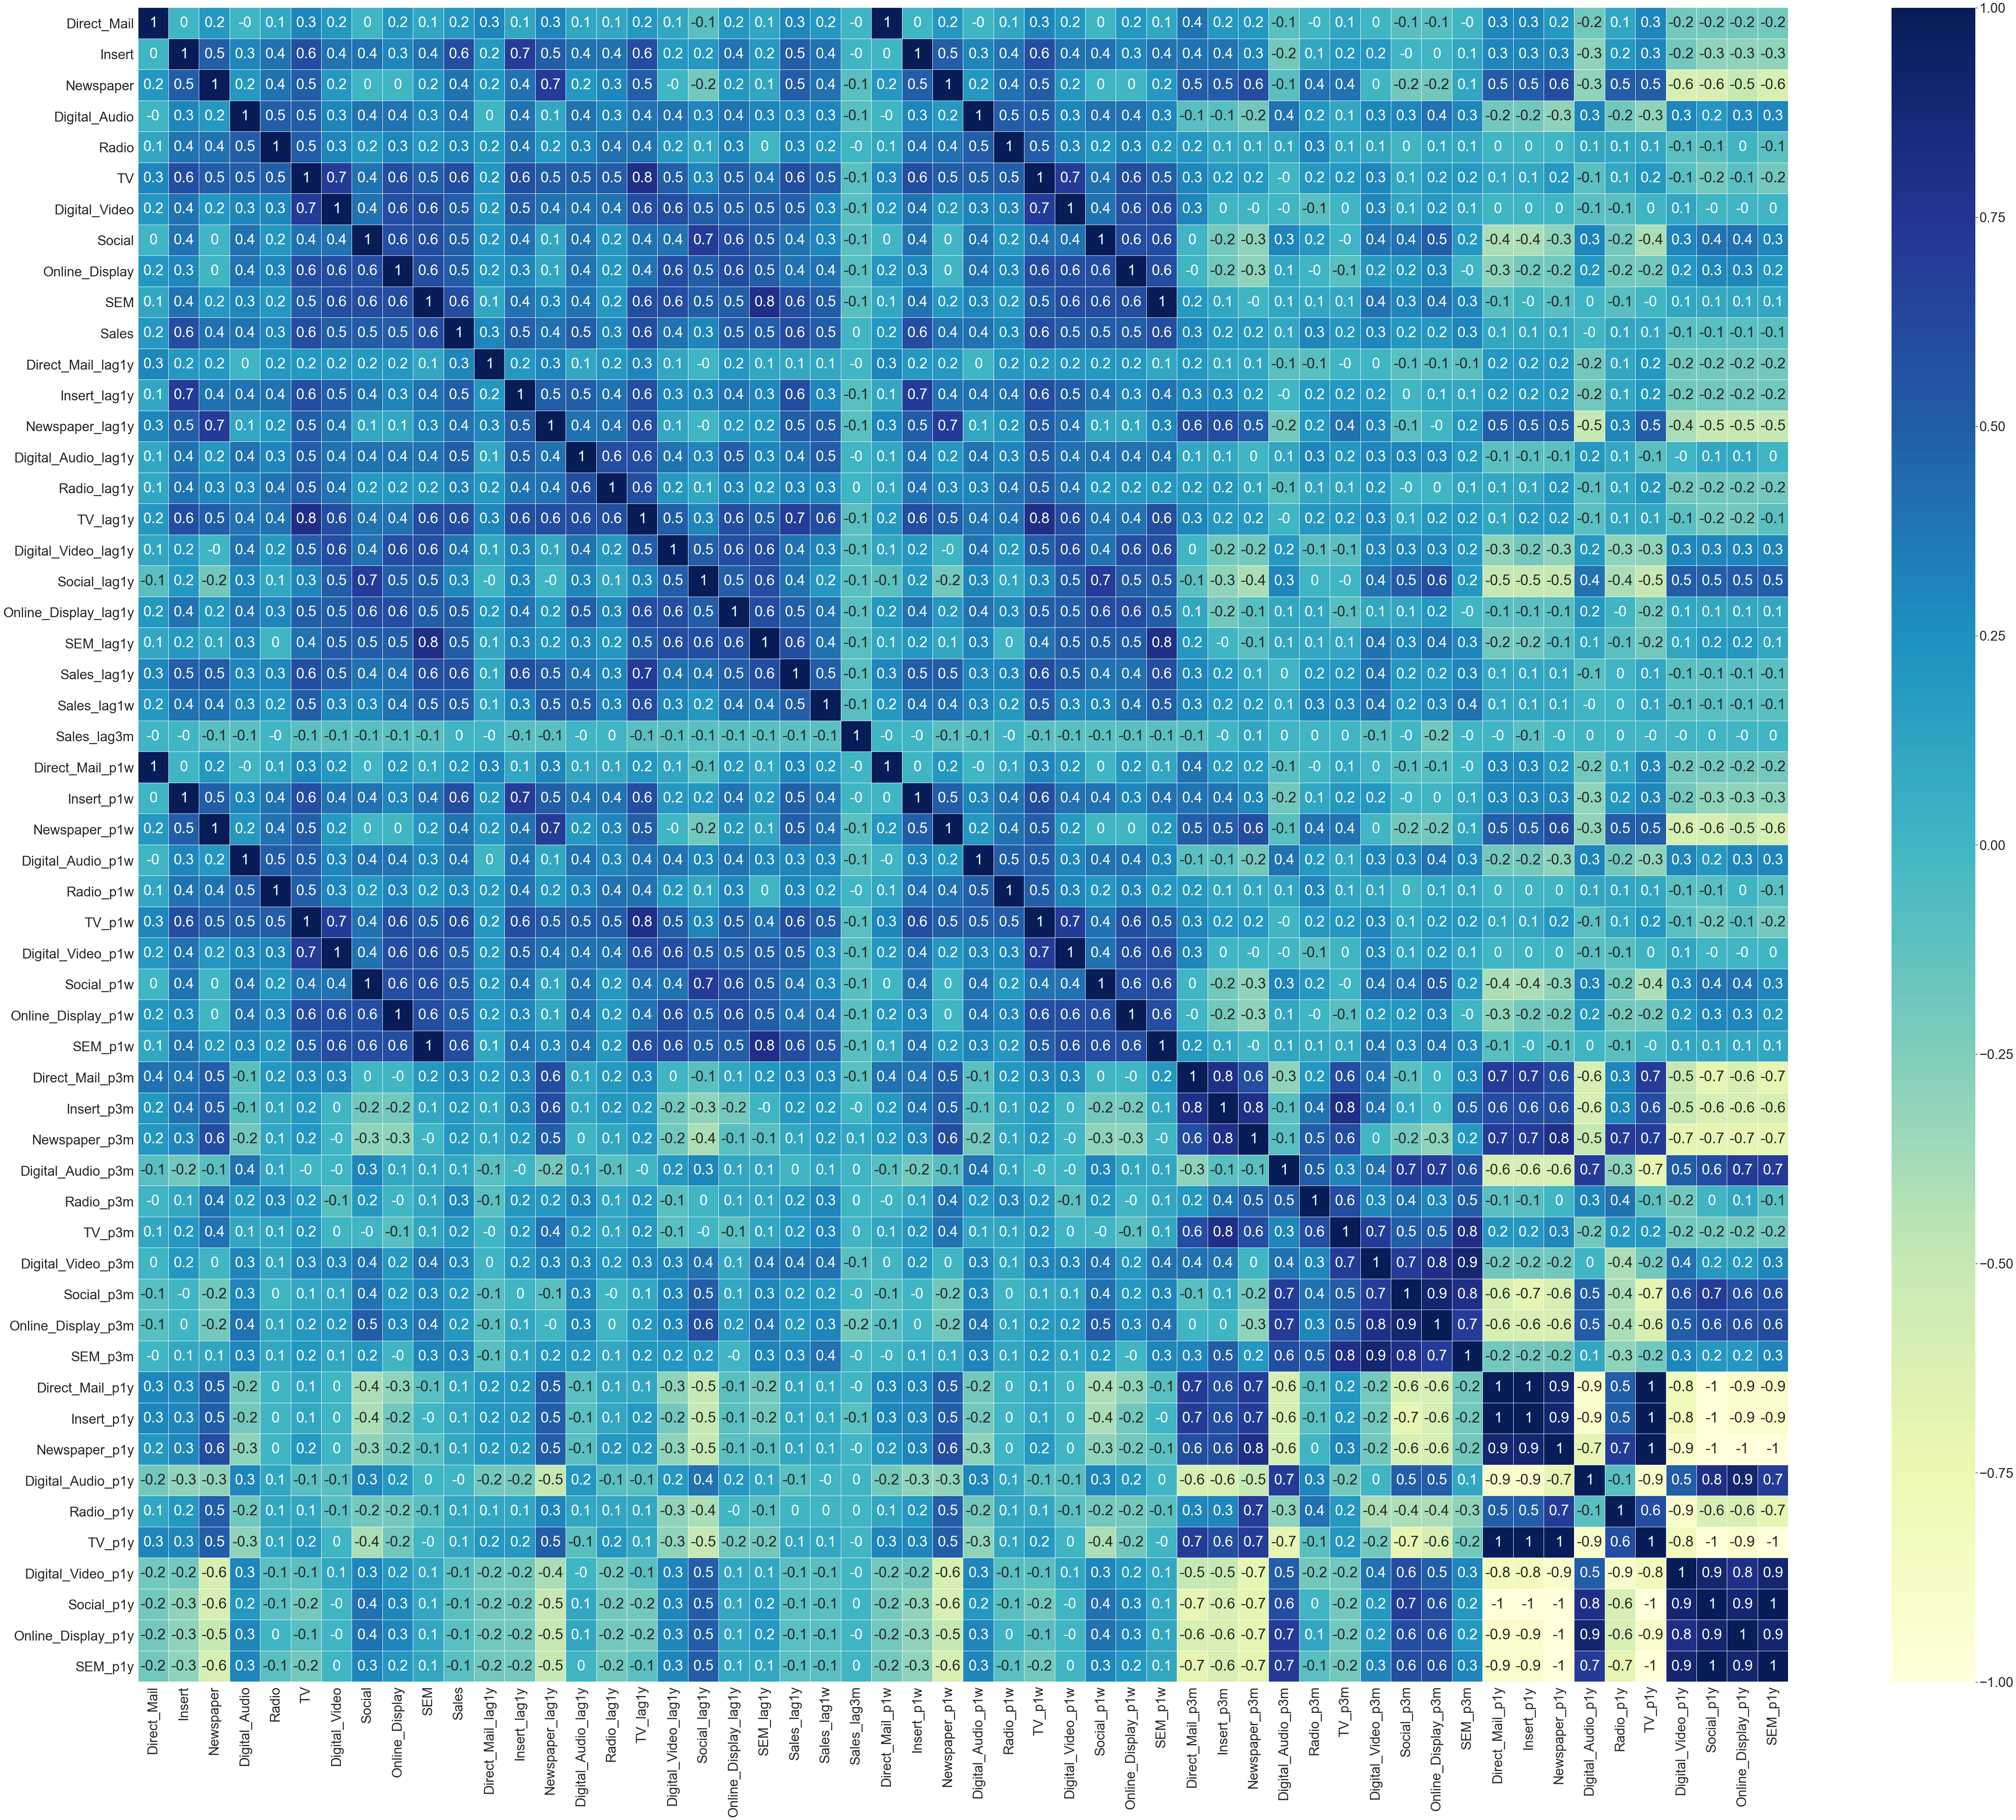

In [22]:
sales_corr = round(sale_spend.corr(), 1)
sns.set(font_scale=3)
plt.subplots(figsize=(90,75))

sns.heatmap(sales_corr, cmap='YlGnBu', linewidth=.005, annot=True)

In [23]:
# Channel spend and channel spend p1W (1wk rolling avg) highly correlated (corr = 1)
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_p1w')]

In [24]:
#Check for nulls and only print columns that contain nulls
missing_data = sale_spend.isnull().sum()
missing_data

Direct_Mail             0
Insert                  0
Newspaper               0
Digital_Audio           0
Radio                   0
TV                      0
Digital_Video           0
Social                  0
Online_Display          0
SEM                     0
Sales                   0
Direct_Mail_lag1y       0
Insert_lag1y            0
Newspaper_lag1y         0
Digital_Audio_lag1y     0
Radio_lag1y             0
TV_lag1y                0
Digital_Video_lag1y     0
Social_lag1y            0
Online_Display_lag1y    0
SEM_lag1y               0
Sales_lag1y             0
Sales_lag1w             0
Sales_lag3m             0
Direct_Mail_p3m         0
Insert_p3m              0
Newspaper_p3m           0
Digital_Audio_p3m       0
Radio_p3m               0
TV_p3m                  0
Digital_Video_p3m       0
Social_p3m              0
Online_Display_p3m      0
SEM_p3m                 0
Direct_Mail_p1y         0
Insert_p1y              0
Newspaper_p1y           0
Digital_Audio_p1y       0
Radio_p1y   

In [25]:
sale_spend = sale_spend.dropna()
sale_spend.shape

(156, 44)

In [26]:
y = sale_spend['Sales']
X1 = sale_spend.loc[:, sale_spend.columns != 'Sales']
X = X1.loc[:, X1.columns != 'Week_Start']

regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [27]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns

In [28]:
vif.round(1)

VIF Factor              Features
0          6.1           Direct_Mail
1         13.6                Insert
2         11.4             Newspaper
3         11.6         Digital_Audio
4         12.1                 Radio
5         15.0                    TV
6          9.5         Digital_Video
7         15.4                Social
8         16.8        Online_Display
9         18.6                   SEM
10         5.7     Direct_Mail_lag1y
11        10.2          Insert_lag1y
12         9.1       Newspaper_lag1y
13        11.0   Digital_Audio_lag1y
14        10.6           Radio_lag1y
15        19.8              TV_lag1y
16         8.6   Digital_Video_lag1y
17        13.6          Social_lag1y
18        17.8  Online_Display_lag1y
19        16.6             SEM_lag1y
20        17.6           Sales_lag1y
21        15.2           Sales_lag1w
22         8.5           Sales_lag3m
23       330.8       Direct_Mail_p3m
24       377.4            Insert_p3m
25        61.0         Newspaper_p3m
26       392.4     Digital_Audio_p3m
27       492.4             Radio_p3m
28       341.5                TV_p3m
29       324.8     Digital_Video_p3m
30       291.0            Social_p3m
31       446.3    Online_Display_p3m
32       422.5               SEM_p3m
33      5171.5       Direct_Mail_p1y
34      6337.9            Insert_p1y
35      1497.3         Newspaper_p1y
36      4190.0     Digital_Audio_p1y
37      9230.9             Radio_p1y
38     10371.9                TV_p1y
39      4525.6     Digital_Video_p1y
40      1979.2            Social_p1y
41      9168.1    Online_Display_p1y
42     11620.2               SEM_p1y

variable selection

In [39]:
#Lasso Regression
model=Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 32364561.209 (5714913.962)


In [41]:
# grid search hyperparameters for lasso regression
y = sale_spend['Sales']
X1 = sale_spend.loc[:, sale_spend.columns != 'Sales']
X = X1.loc[:, X1.columns != 'Week_Start']
model=Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha']=arange(0,1,0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results=search.fit(X,y)
print('Mean MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean MAE: -32364561.209
Config: {'alpha': 0.99}


C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.710227351577307e+16, tolerance: 41212967428921.71
  model = cd_fast.enet_coordinate_descent(


In [44]:
# use automatically configured the lasso regression algorithm
y = sale_spend['Sales']
X1 = sale_spend.loc[:, sale_spend.columns != 'Sales']
X = X1.loc[:, X1.columns != 'Week_Start']

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LassoCV(alphas=arange(0,1,0.01), cv=cv, n_jobs=-1)

model.fit(X,y)
print('alpha: %f' % model.alpha_)

C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.825956233131661e+16, tolerance: 39766070743920.41
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.002929513092767e+16, tolerance: 25008059695104.69
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.953357046456659e+16, tolerance: 39971210375833.52
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.936894524565992e+16, tolerance: 38231323094502.37
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.733282543577378e+16, tolerance: 39766070743920.41
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.913847079091752e+16, tolerance: 37409924578097.29
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.142415879868503e+16, tolerance: 25008059695104.69
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0750023932015496e+16, tolerance: 39766070743920.41
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8710499012163596e+16, tolerance: 33629020466627.77
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.57671384751602e+16, tolerance: 33865390445493.293
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8537654376963256e+16, tolerance: 36096892197136.38
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.827283384966832e+16, tolerance: 25008059695104.69
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.129008391638023e+16, tolerance: 39843124839821.695
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.896914155203016e+16, tolerance: 39590975542949.63
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.109826664314153e+16, tolerance: 33968726745565.152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.008092752961954e+16, tolerance: 39843124839821.695
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.243362036009445e+16, tolerance: 36668432201340.64
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0004216857723344e+16, tolerance: 39649565614154.875
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_des

alpha: 0.940000


C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.434554926201069e+16, tolerance: 39715902444226.22
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.364646315806074e+16, tolerance: 39649565614154.875
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.208527485699944e+16, tolerance: 36668432201340.64
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\djdit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce